In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
import numpy as np

# Analysis of Stackoverflow’s 2021 and 2022 Annual Developer Survey for Turkish Data Scientists and Developers

## Business Understanding
Using data from the 2022/2021 Stack Overflow Survey, this project aims to provide insights on the following questions:

-Which programming language using among Turkish Data Scientists?

-Which duo is using among Turkish Data Scientists for programming language and collobtools?

-How does company size affect the salary of Turkish developers in 2022?

-What is the ideal company size for Turkish developers in terms of salary?


In [58]:
# Read in the data for each year
df_22 = pd.read_csv("C:/Udacity/Blogspot/2022/survey_results_public.csv")
df_21 = pd.read_csv("C:/Udacity/Blogspot/2021/survey_results_public.csv")

# Filter for data scientists in Turkey
tr_df_22 = df_22[(df_22['Country'] == 'Turkey') &
                                  df_22['DevType'].str.contains('Data scientist or machine learning specialist')]
tr_df_21 = df_21[(df_21['Country'] == 'Turkey') &
                                  df_21['DevType'].str.contains('Data scientist or machine learning specialist')]

In [26]:
tr_df_22.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
5809,5810,I am a developer by profession,"Employed, full-time;Student, full-time",Fully remote,Hobby;Contribute to open-source projects;Other...,Bachelor’s degree,Other online resources ;School ;Online Courses...,Technical documentation;Blogs;Stack Overflow;V...,Coursera;Other,8,...,30-60 minutes a day,15-30 minutes a day,Just right,Innersource initiative;DevOps function;Develop...,Yes,No,Yes,Appropriate in length,Easy,NaN
7610,7611,I am a developer by profession,"Not employed, but looking for work",NaN,NaN,Bachelor’s degree,Other online resources ;School ;Online Courses...,Technical documentation;Blogs;Written Tutorial...,Udemy,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
7763,7764,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects;Freel...,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow;O...,NaN,5,...,30-60 minutes a day,30-60 minutes a day,Just right,Innersource initiative;DevOps function;Microse...,No,Yes,Yes,Appropriate in length,Neither easy nor difficult,NaN
8202,8203,I am a developer by profession,"Student, full-time;Not employed, but looking f...",Fully remote,Hobby;Contribute to open-source projects;Other...,Bachelor’s degree,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
8660,8661,I am a developer by profession,"Employed, full-time",Full in-person,Hobby;Contribute to open-source projects;Schoo...,Master’s degree,Friend or family member;Coding Bootcamp;Other ...,NaN,NaN,10,...,30-60 minutes a day,15-30 minutes a day,Very long,None of these,No,No,Yes,Appropriate in length,Neither easy nor difficult,NaN


In [27]:
tr_df_21.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
1117,1118,"I am not primarily a developer, but I write co...",Employed full-time,Turkey,NaN,NaN,Bachelor’s degree,18 - 24 years,Other online resources;School,5,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
3574,3575,I code primarily as a hobby,Employed full-time,Turkey,NaN,NaN,Something else,18 - 24 years,Other online resources;Online Forum;Online Cou...,2,...,18-24 years old,Man,No,Straight / Heterosexual,"Or, in your own words:",None of the above,None of the above,Too long,Easy,NaN
4507,4508,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,Master’s degree,18 - 24 years,Online Courses or Certification,10,...,35-44 years old,Man,No,Gay or Lesbian,Prefer not to say,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,713448.0
5406,5407,I am a developer by profession,Employed part-time,Turkey,NaN,NaN,Bachelor’s degree,11 - 17 years,Friend or family member;Books / Physical media,17,...,25-34 years old,Man,No,Straight / Heterosexual,Middle Eastern;Biracial,None of the above,None of the above,Appropriate in length,Easy,NaN
5622,5623,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,Master’s degree,18 - 24 years,Other online resources;School;Online Courses o...,10,...,25-34 years old,Man,No,Straight / Heterosexual,Middle Eastern,None of the above,None of the above,Appropriate in length,Easy,39444.0


# Data Exploration

Before starting the project, it's important to gather some general information about Turkish data scientists. This can help us better understand the characteristics of our target audience and tailor our project accordingly. Some key information we may want to gather includes the number of data scientists in Turkey, their education, age or how did they learn code. By exploring this data, we can gain valuable insights that can inform our project and help us create more effective solutions.

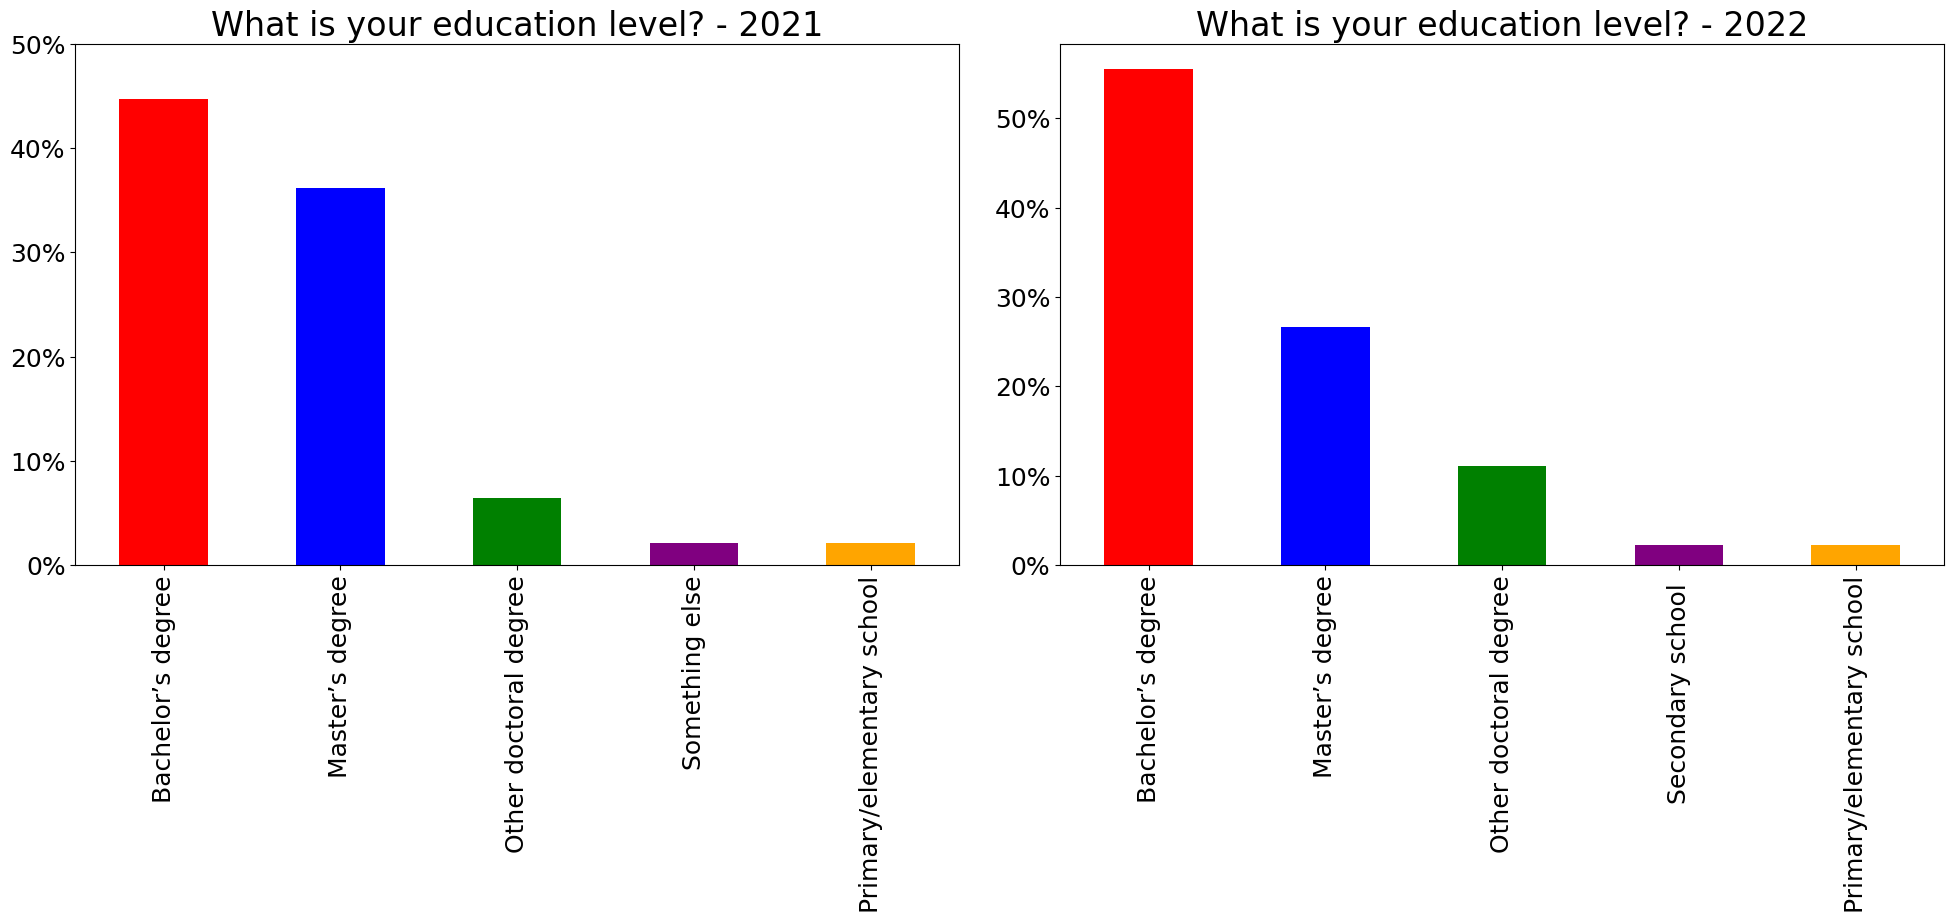

In [28]:
def display_bar_chart(tr_df, column, title, ax):
    status_vals = tr_df[column].value_counts()[:5]
    (status_vals[:10]/tr_df.shape[0]).plot(kind="bar", ax=ax,
                                           color=['red', 'blue', 'green', 'purple', 'orange'])
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 0.6, 0.1))  # set tick positions
    ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])  # set tick labels


fig, ax = plt.subplots(1, 2, figsize=(20, 10))

display_bar_chart(tr_df_21, "EdLevel",
                  "What is your education level? - 2021", ax[0])
display_bar_chart(tr_df_22, "EdLevel",
                  "What is your education level? - 2022", ax[1])

plt.tight_layout()
plt.rcParams.update({'font.size': 20})
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)
plt.show()

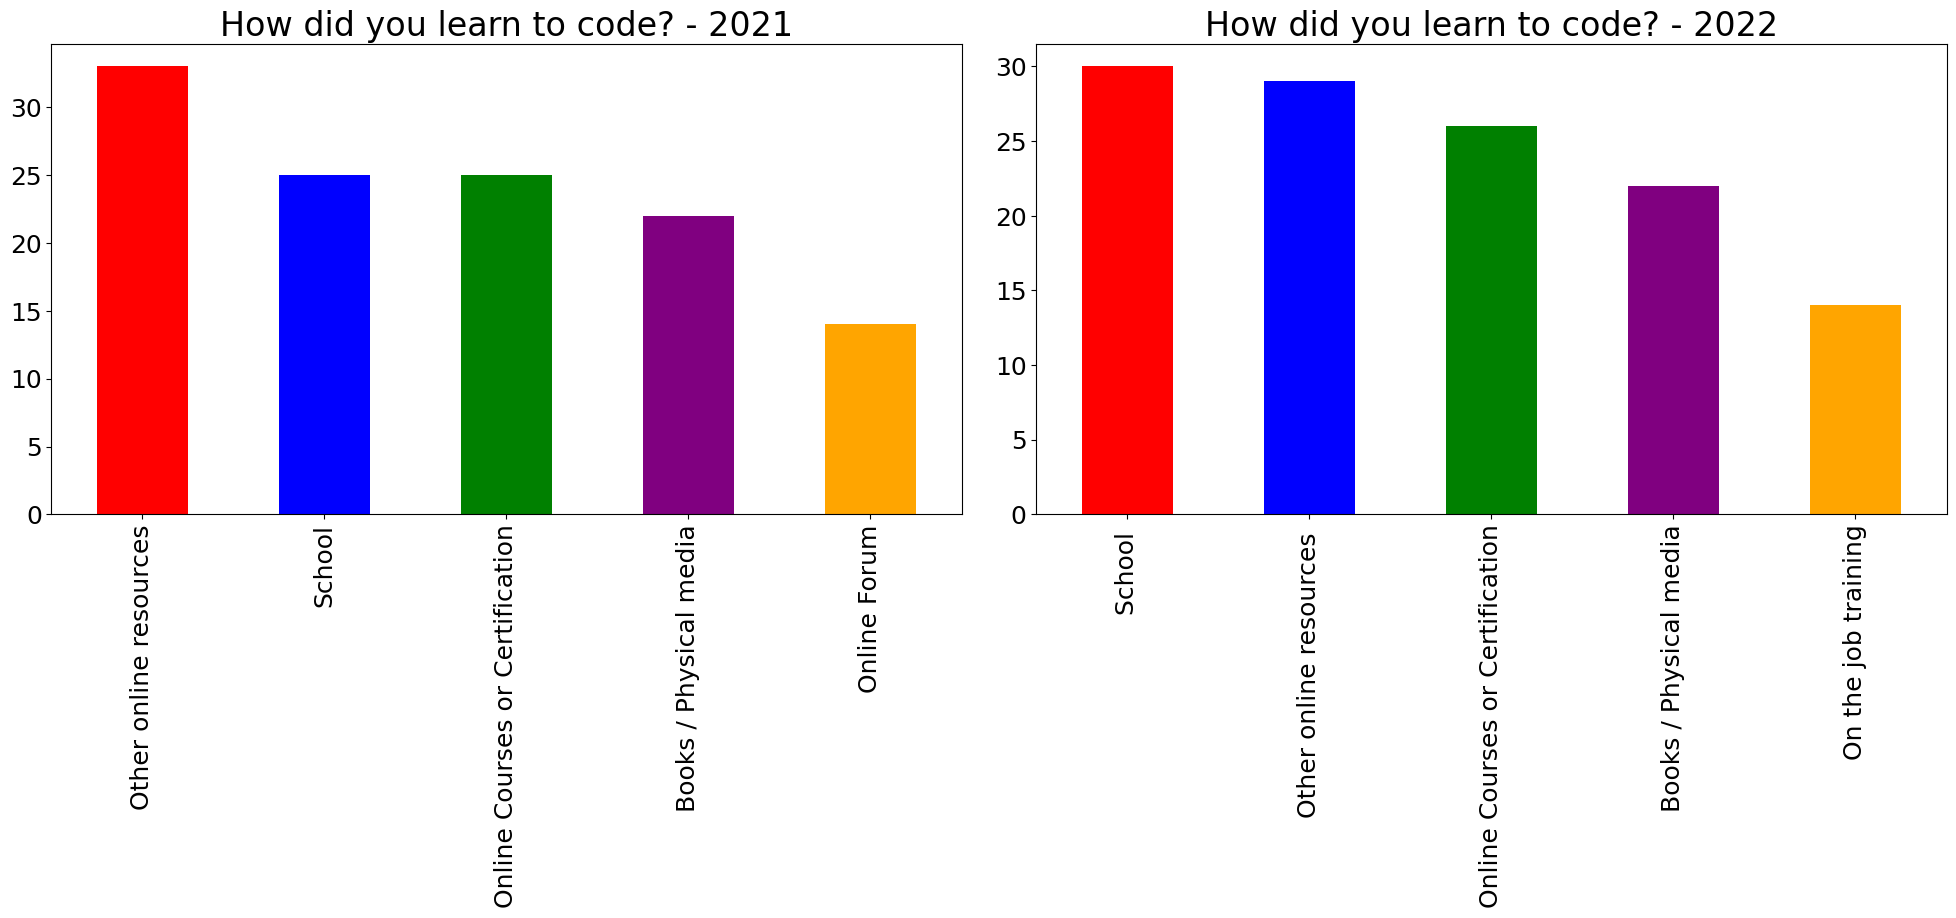

In [29]:
def display_bar_chart(tr_df, column, title, ax):
    # Split the answers and sum the counts of each split answer
    split_answers = tr_df[column].str.split(";", expand=True).stack().value_counts()
    # Plot the top 5 split answers
    split_answers[:5].plot(kind="bar", ax=ax, color=['red', 'blue', 'green', 'purple', 'orange']);
    ax.set_title(title)
    
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

display_bar_chart(tr_df_21, "LearnCode", "How did you learn to code? - 2021", ax[0])
display_bar_chart(tr_df_22, "LearnCode", "How did you learn to code? - 2022", ax[1])

plt.tight_layout()
plt.rcParams.update({'font.size': 20})
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)
plt.show()

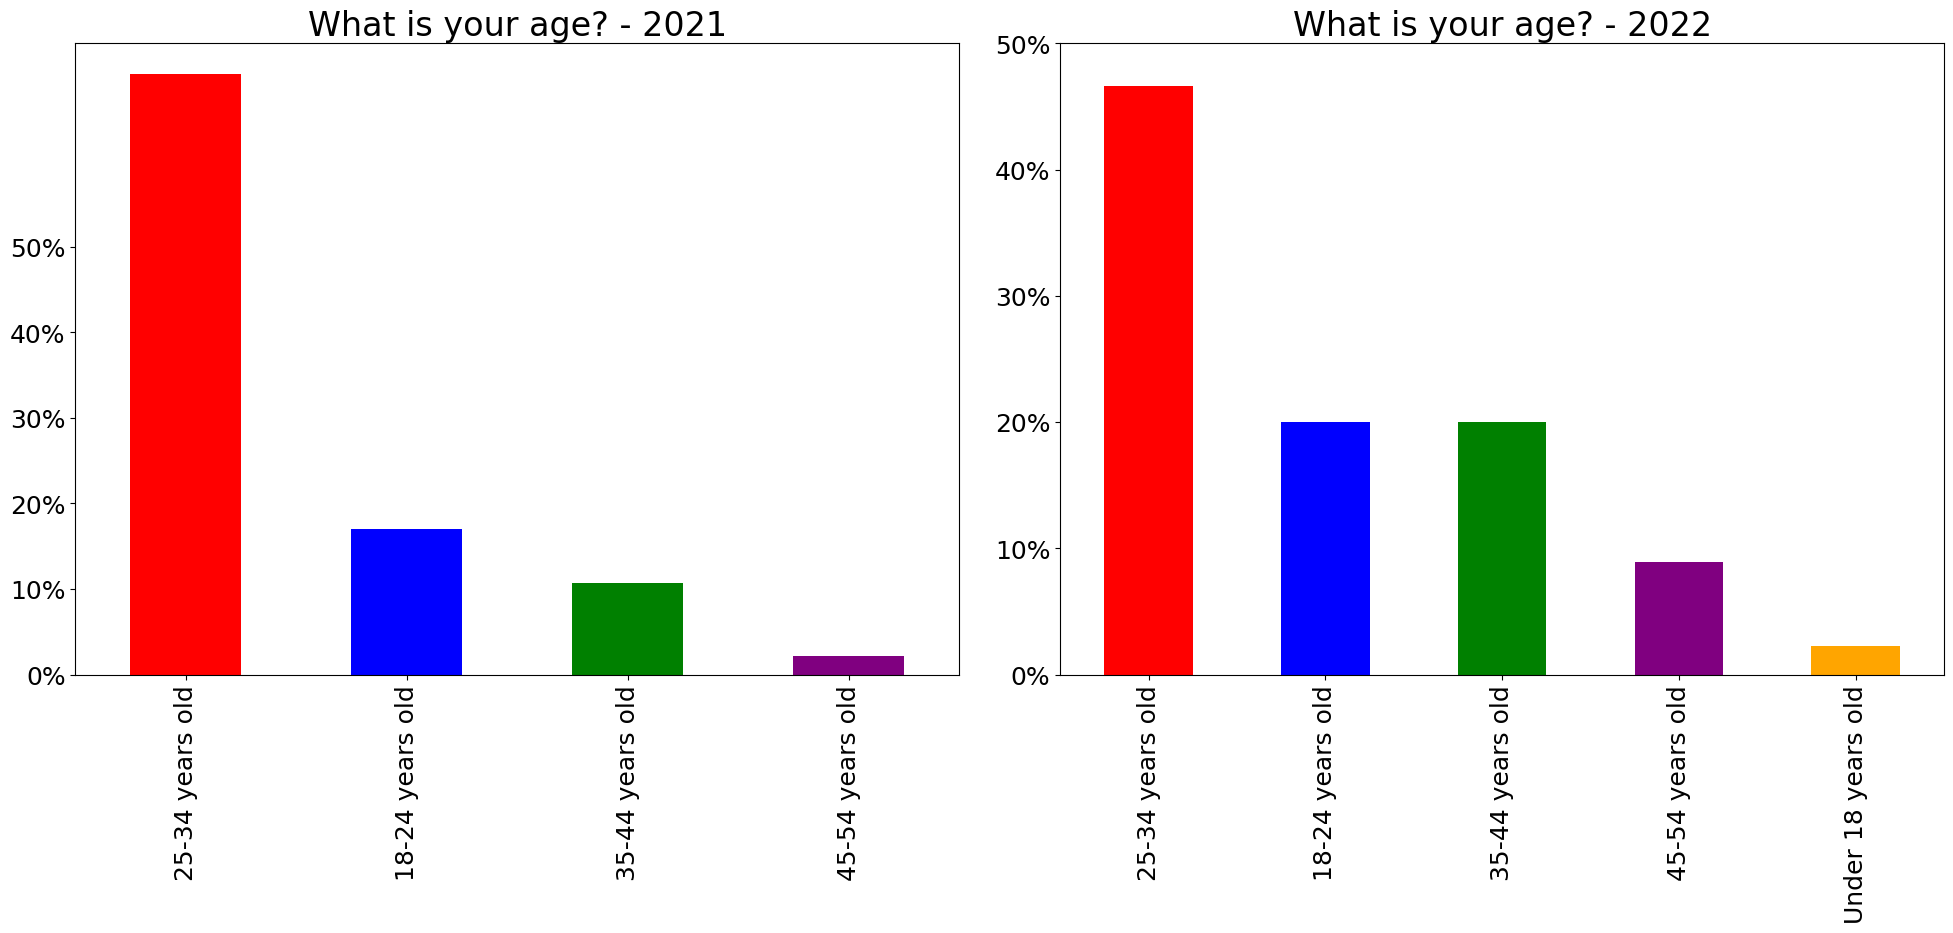

In [30]:
def display_bar_chart(tr_df, column, title, ax):
    status_vals = tr_df[column].value_counts()[:5]
    (status_vals[:10]/tr_df.shape[0]).plot(kind="bar", ax=ax, color=['red', 'blue', 'green', 'purple', 'orange'])
    ax.set_title(title)
    ax.set_yticks(np.linspace(0, 0.5, 6))
    ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

display_bar_chart(tr_df_21, "Age", "What is your age? - 2021", ax[0])
display_bar_chart(tr_df_22, "Age", "What is your age? - 2022", ax[1])

plt.tight_layout()
plt.rcParams.update({'font.size': 20})
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)
plt.show()

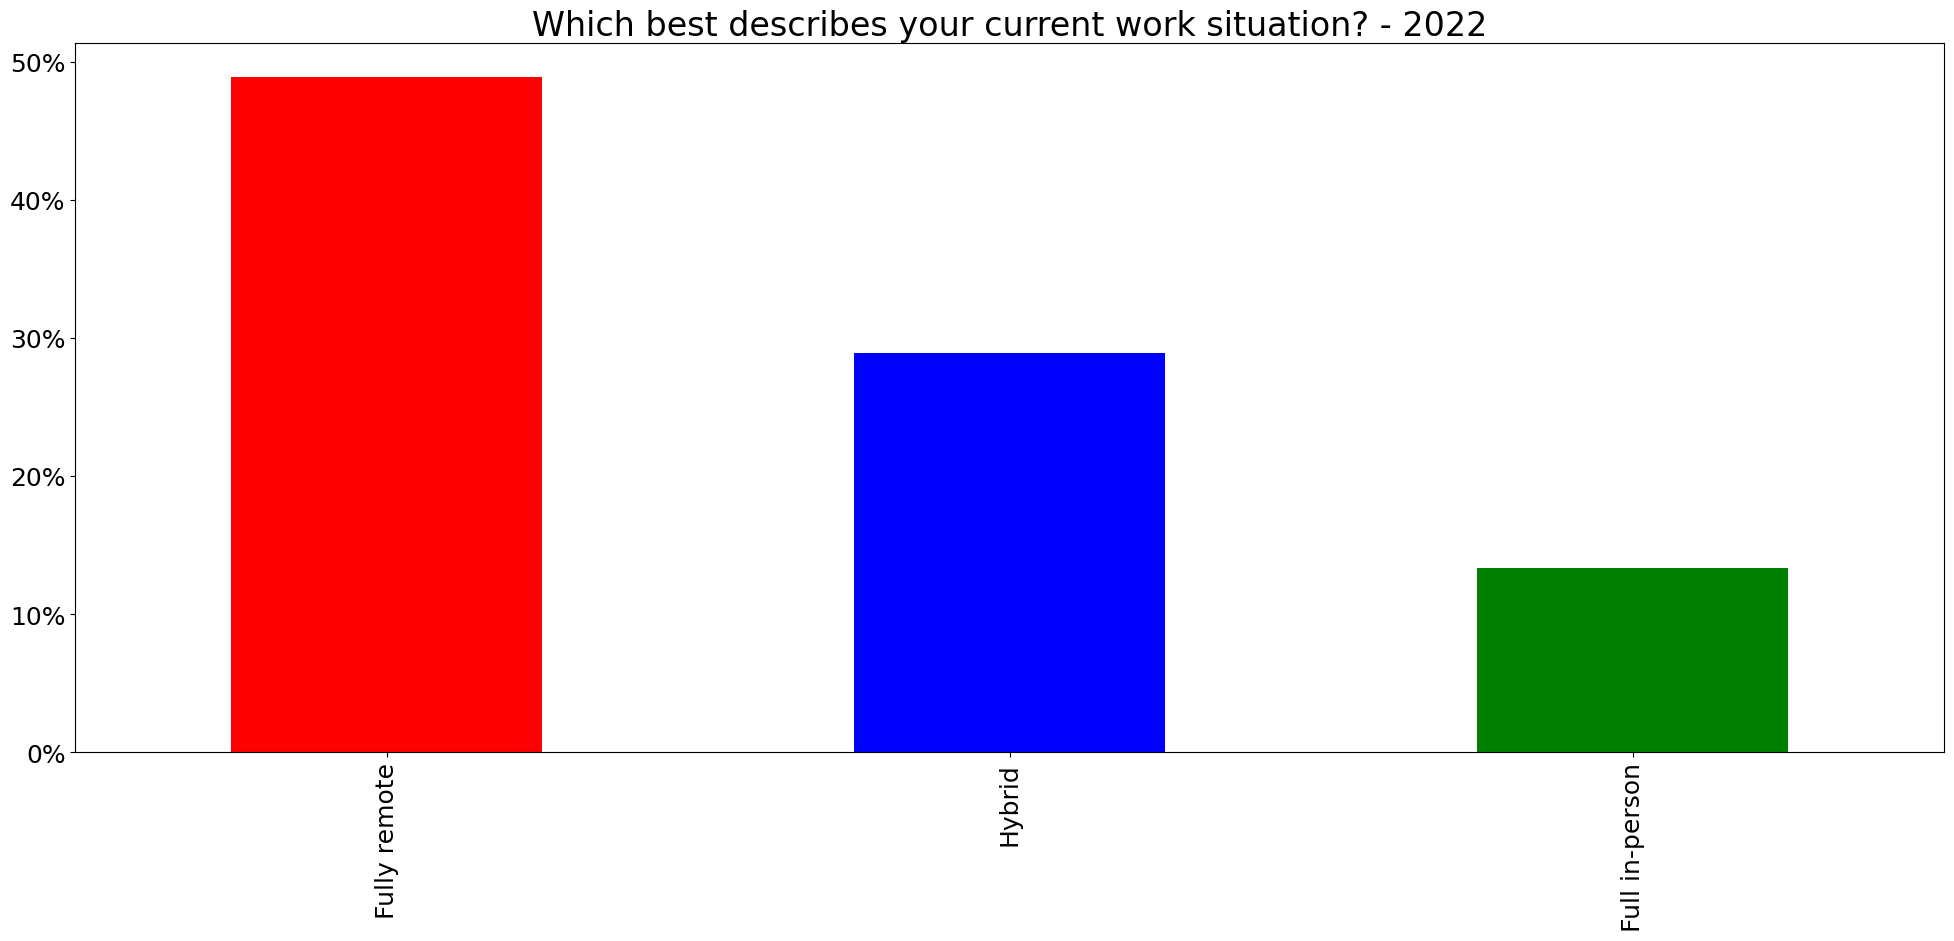

In [31]:
def display_bar_chart(tr_df, column, title, ax):
    status_vals = tr_df[column].value_counts()[:5]
    (status_vals[:10]/tr_df.shape[0]).plot(kind="bar", ax=ax, color=['red', 'blue', 'green', 'purple', 'orange'])
    ax.set_title(title)
    ax.set_yticks(np.linspace(0, 0.5, 6))
    ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])

fig, ax = plt.subplots(1, figsize=(20, 10))

display_bar_chart(tr_df_22, "RemoteWork", "Which best describes your current work situation? - 2022", ax)

plt.tight_layout()
plt.rcParams.update({'font.size': 20})
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()

# Which programming language using among Turkish Data Scientists?

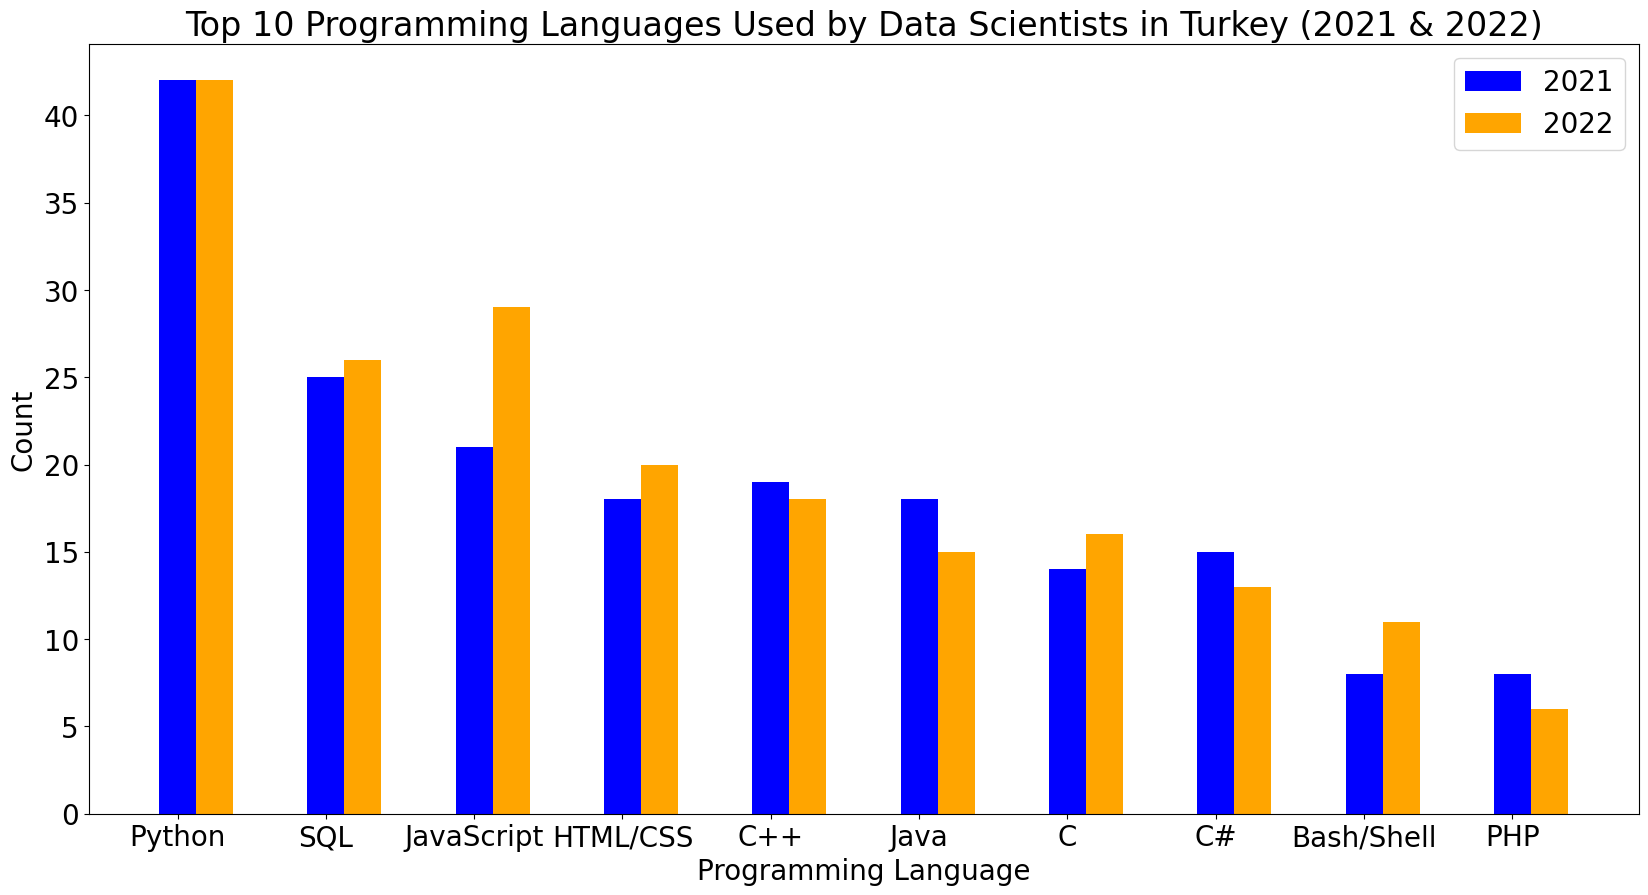

In [32]:
# Filter for data scientists in Turkey
tr_df_22 = df_22[(df_22['Country'] == 'Turkey') &
                                  df_22['DevType'].str.contains('Data scientist or machine learning specialist')].dropna(subset=['LanguageHaveWorkedWith'])

tr_df_21 = df_21[(df_21['Country'] == 'Turkey') &
                                  df_21['DevType'].str.contains('Data scientist or machine learning specialist')].dropna(subset=['LanguageHaveWorkedWith'])


# Split the data in the "LanguageHaveWorkedWith" column
tr_df_22['LanguageHaveWorkedWith'] = tr_df_22['LanguageHaveWorkedWith'].str.split(
    ";")
tr_df_21['LanguageHaveWorkedWith'] = tr_df_21['LanguageHaveWorkedWith'].str.split(
    ";")

# Create a dataframe with only the programming languages and their count for 2022
programming_2022 = tr_df_22.explode('LanguageHaveWorkedWith').groupby(
    'LanguageHaveWorkedWith').size().reset_index(name='2022')
programming_2022.columns = ['LanguageHaveWorkedWith', '2022']

# Create a dataframe with only the programming languages and their count for 2021
programming_2021 = tr_df_21.explode('LanguageHaveWorkedWith').groupby(
    'LanguageHaveWorkedWith').size().reset_index(name='2021')
programming_2021.columns = ['LanguageHaveWorkedWith', '2021']



# Merge the two dataframes
programming = programming_2021.merge(programming_2022, on='LanguageHaveWorkedWith')

# Add a new column with the sum of 2022 and 2021 counts
programming = programming.assign(sum=programming.apply(
    lambda x: x['2022'] + x['2021'] , axis=1)).sort_values(by='sum', ascending=False)

# Display only the top 10 results
top_10 = programming.head(10)

# Plot the bar chart
bar_width = 0.25
x = np.arange(len(top_10))

fig = plt.figure(figsize=(20, 10))

plt.bar(x + bar_width, top_10['2021'], bar_width, color='blue', label='2021')
plt.bar(x + bar_width * 2, top_10['2022'],
        bar_width, color='orange', label='2022')

# Add labels and title
plt.xticks(x + bar_width, top_10['LanguageHaveWorkedWith'])
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.title("Top 10 Programming Languages Used by Data Scientists in Turkey (2021 & 2022)")

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Python** remains the most popular programming language among Turkish data scientists and shows no signs of losing its position anytime soon. It is interesting to note that **JavaScript** has seen the highest increase in usage between 2021 and 2022. However, it is too early to determine if this trend will continue as we only have data for two years.

# What is the most commonly used together programming language and collaboration tool among Turkish Data Scientists?

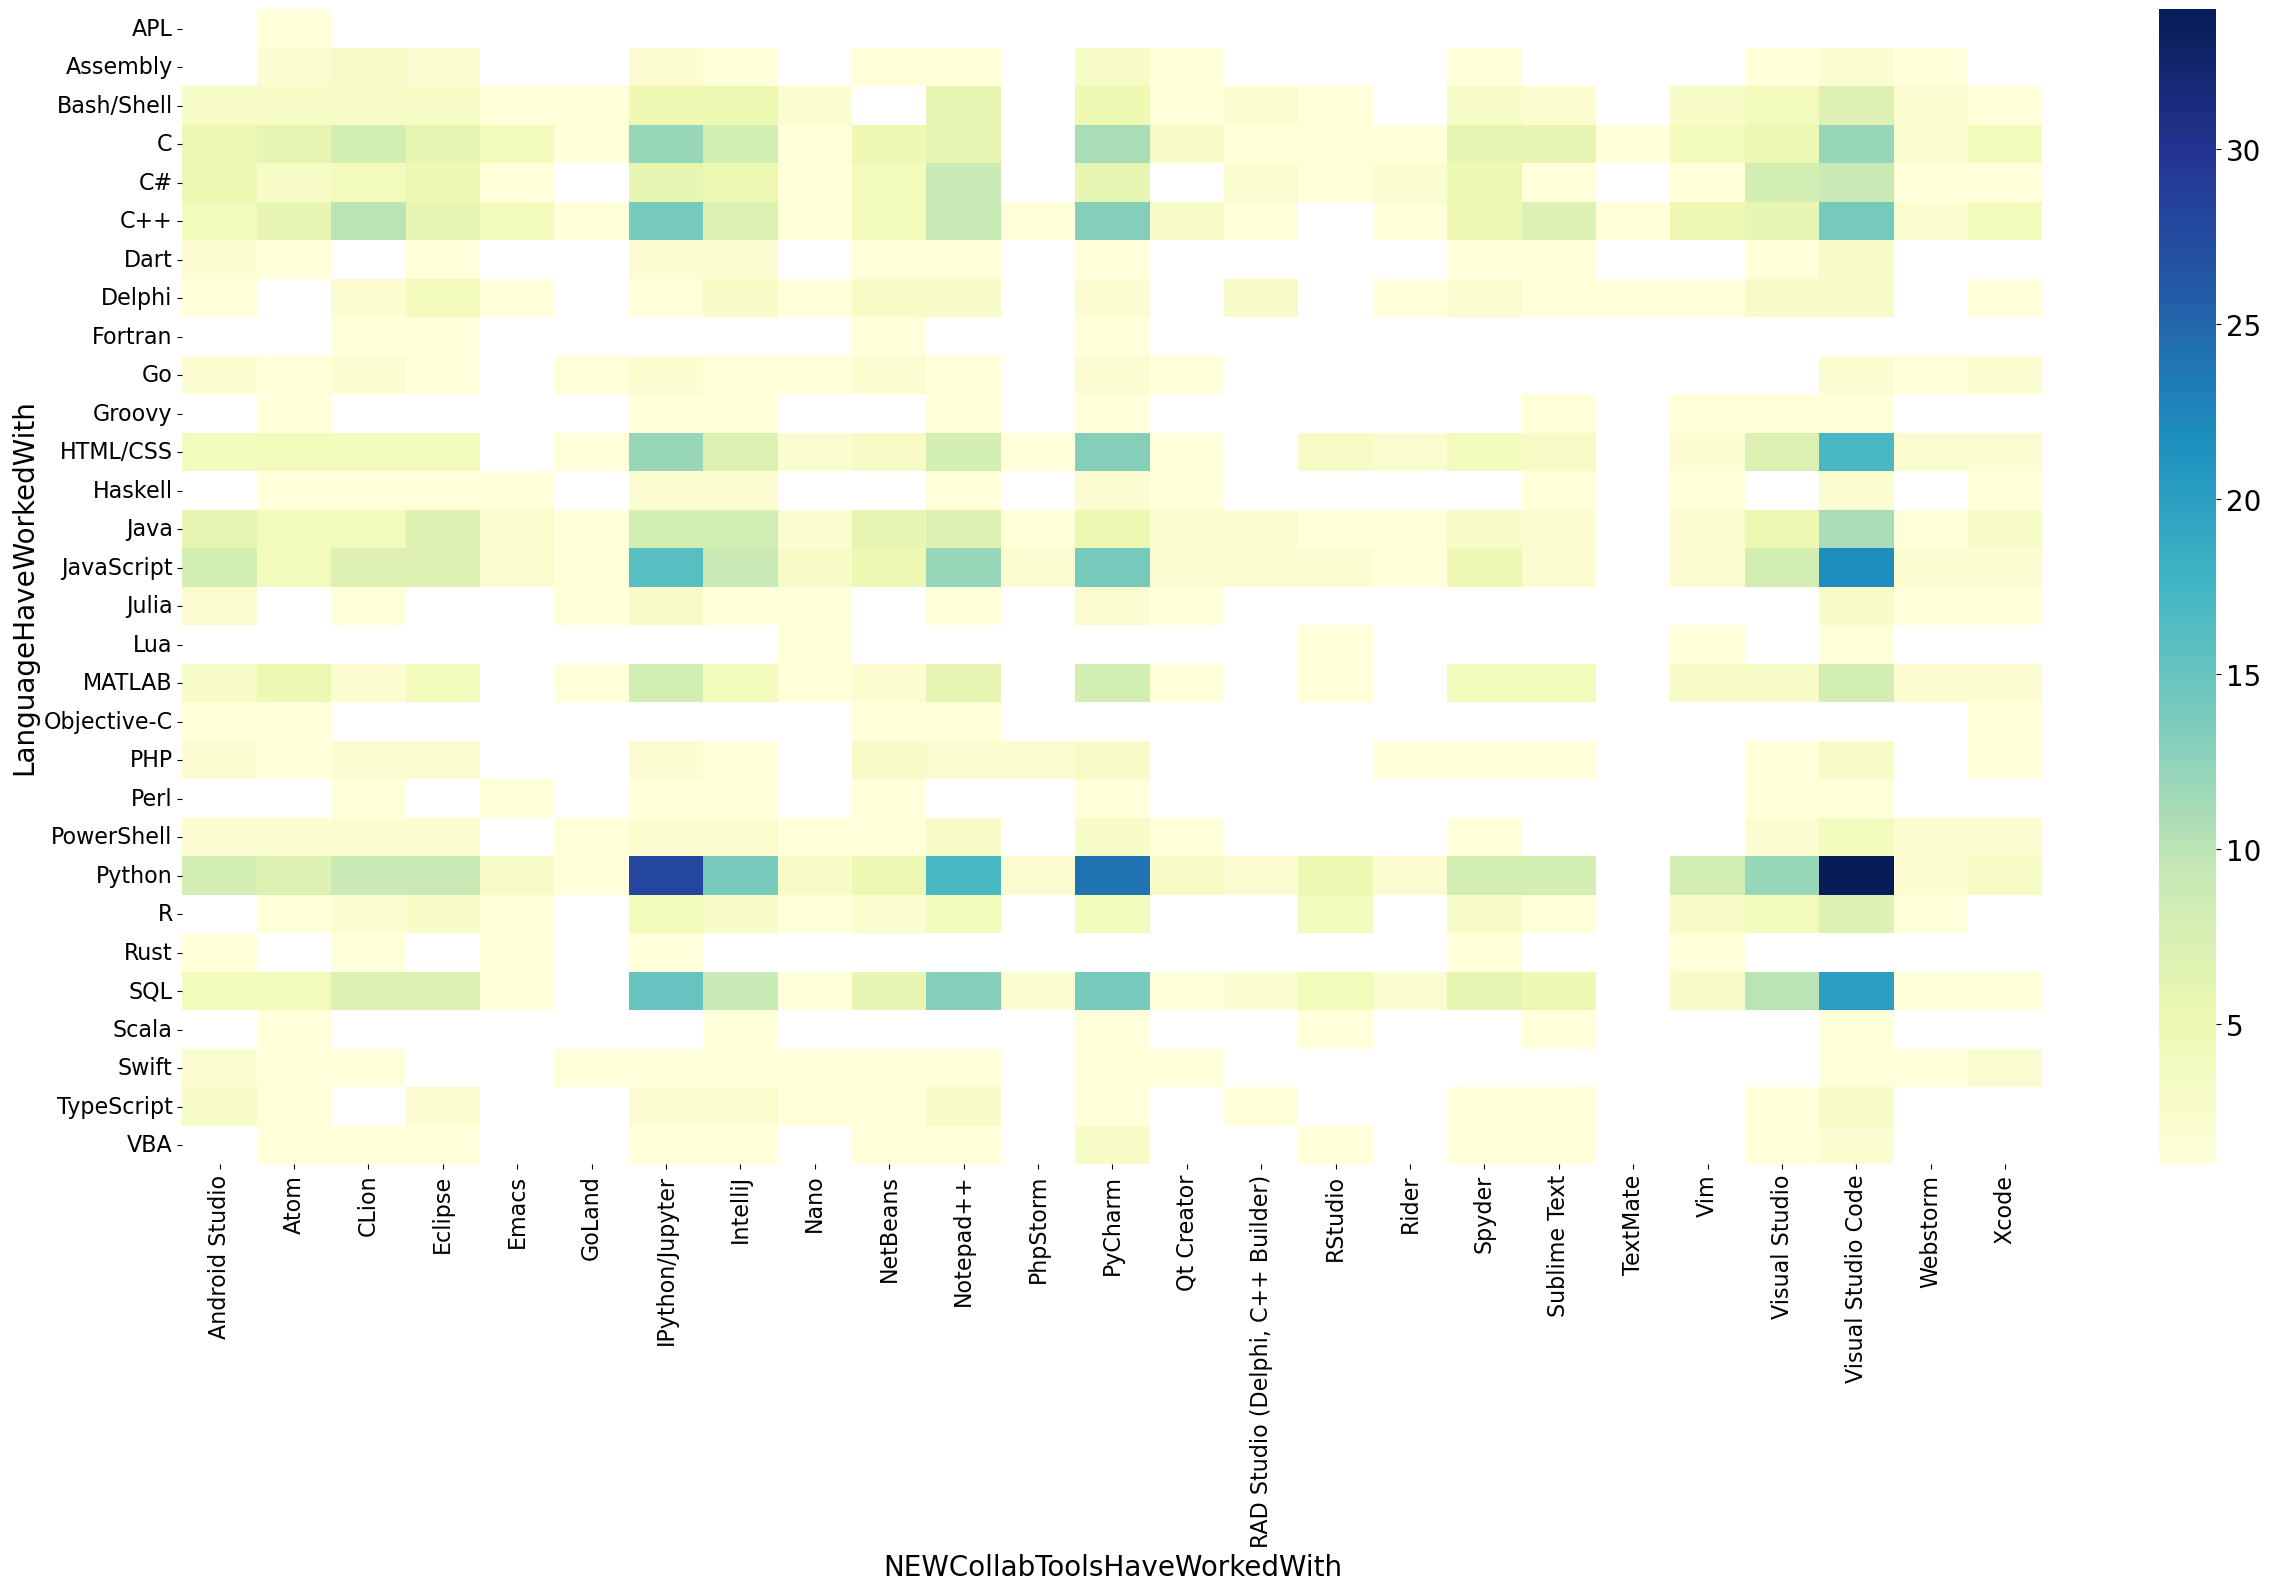

In [56]:
# Filter for data scientists in Turkey
tr_df_22 = df_22[(df_22['Country'] == 'Turkey') &
                                  df_22['DevType'].str.contains('Data scientist or machine learning specialist')]
tr_df_21 = df_21[(df_21['Country'] == 'Turkey') &
                                  df_21['DevType'].str.contains('Data scientist or machine learning specialist')]

subset = ['LanguageHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith']
tr_df_22 = tr_df_22.dropna(subset=subset)
tr_df_21 = tr_df_21.dropna(subset=subset)

# Split the data in the "LanguageHaveWorkedWith" column
tr_df_22['LanguageHaveWorkedWith'] = tr_df_22['LanguageHaveWorkedWith'].str.split(
    ";")
tr_df_21['LanguageHaveWorkedWith'] = tr_df_21['LanguageHaveWorkedWith'].str.split(
    ";")
tr_df_22['NEWCollabToolsHaveWorkedWith'] = tr_df_22['NEWCollabToolsHaveWorkedWith'].str.split(
    ";")
tr_df_21['NEWCollabToolsHaveWorkedWith'] = tr_df_21['NEWCollabToolsHaveWorkedWith'].str.split(
    ";")


result = []
for index, row in tr_df_22.iterrows():
    languages = row['LanguageHaveWorkedWith']
    tools = row['NEWCollabToolsHaveWorkedWith']
    result.extend(list(product(languages, tools)))

result_df = pd.DataFrame(
    result, columns=['LanguageHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith'])


# Get the counts of each combination of LanguageHaveWorkedWith and NEWCollabToolsHaveWorkedWith
result_df_counts = result_df.groupby(
    ['LanguageHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='counts')

# Create a pivot table to create the heatmap
pivot_table = result_df_counts.pivot(
    index='LanguageHaveWorkedWith', columns='NEWCollabToolsHaveWorkedWith', values='counts')

# Create the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(pivot_table, annot=False, cmap='YlGnBu')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()


According to the survey data, the most commonly used combination of programming language and collaboration tool among Turkish data scientists is **Python and Visual Studio Code**. Following closely are **Python and IPython**, and **Python and PyCharm**.

 # How does company size affect the salary of Turkish developers in 2022?


In [45]:
# Reading the csv file into a DataFrame
df_2022 = pd.read_csv("C:/Udacity/Blogspot/2022/survey_results_public.csv")

# Filtering the data for only Turkish developers who are employed full-time and using TRY (Turkish Lira) as their currency
turkey_programming_2022 = df_2022[(df_2022['Country'] == 'Turkey') &
                                  (df_2022['MainBranch'] == 'I am a developer by profession') &
                                  (df_2022['Employment'].str.contains('Employed, full-time')) &
                                  (df_2022['Currency'].str.contains('TRY	Turkish lira'))]

# Removing the rows that have "Just me - I am a freelancer, sole proprietor, etc." as their organization size
turkey_programming_2022 = turkey_programming_2022[turkey_programming_2022['OrgSize']
                                                  != 'Just me - I am a freelancer, sole proprietor, etc.']

# Dropping the rows with missing values in 'CompTotal' column
turkey_programming_2022 = turkey_programming_2022.dropna(subset=['CompTotal'])

# Removing the rows with 'CompTotal' less than 7500
turkey_programming_2022 = turkey_programming_2022[turkey_programming_2022['CompTotal'] >= 7500]

# Removing the rows with 'ConvertedCompYearly' less than 5000
turkey_programming_2022 = turkey_programming_2022[turkey_programming_2022['ConvertedCompYearly'] >= 5000]

# Categories of organization size
org_size_categories = ['2 to 9 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees',
                       '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']

# Calculating the mean salary for each category of organization size
comp_means = []
for size in org_size_categories:
    comp_means.append(round(
        turkey_programming_2022[turkey_programming_2022['OrgSize'] == size]['ConvertedCompYearly'].mean()))

# Creating a DataFrame to store the mean salary for each category of organization size
org_size_comp_mean = pd.DataFrame(
    {'Organization Size': org_size_categories, 'Mean Salary': comp_means})

# Printing the DataFrame
print(org_size_comp_mean)


# Calculate the descriptive statistics for the salary data
salary_data = []
salary_data_2 = []
for size in org_size_categories:
    salary_data.append(turkey_programming_2022[turkey_programming_2022['OrgSize'] == size]['ConvertedCompYearly'])
    salary_data_2.append(turkey_programming_2022[turkey_programming_2022['OrgSize'] == size]['CompTotal'])

# Descriptive Statistics
for i, (data, data_2) in enumerate(zip(salary_data, salary_data_2)):
    print("\n")
    print("Organization Size: ", org_size_categories[i])
    print("Mean: ", round(data.mean(), 2))
    print("Median: ", round(data.median()))
    print("Standard Deviation: ", round(data.std(), 2))
    print("Minimum: ", round(data_2.min()))

          Organization Size  Mean Salary
0          2 to 9 employees        15181
1        10 to 19 employees        17637
2        20 to 99 employees        18521
3      100 to 499 employees        24769
4      500 to 999 employees        27124
5  1,000 to 4,999 employees        23809
6  5,000 to 9,999 employees        16919
7  10,000 or more employees        18991


Organization Size:  2 to 9 employees
Mean:  15180.92
Median:  11280
Standard Deviation:  12573.04
Minimum:  8000


Organization Size:  10 to 19 employees
Mean:  17637.45
Median:  15036
Standard Deviation:  9656.75
Minimum:  7500


Organization Size:  20 to 99 employees
Mean:  18520.56
Median:  13908
Standard Deviation:  13541.3
Minimum:  7800


Organization Size:  100 to 499 employees
Mean:  24769.08
Median:  18792
Standard Deviation:  16127.99
Minimum:  7500


Organization Size:  500 to 999 employees
Mean:  27124.19
Median:  20664
Standard Deviation:  19797.73
Minimum:  10000


Organization Size:  1,000 to 4,999 employee

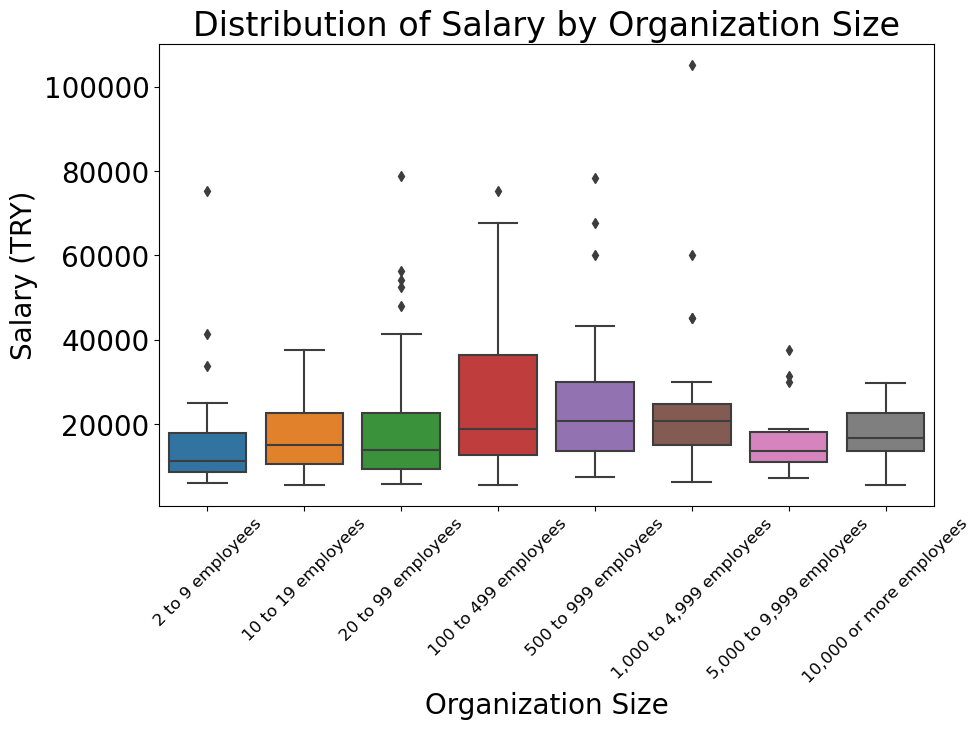

In [71]:
# Increase the size of the plot
plt.figure(figsize=(10,6))

plt.rcParams['xtick.labelsize'] = 12

# Creating a box plot to visualize the distribution of the salary data for each category of organization size
sns.boxplot(x='OrgSize', y='ConvertedCompYearly', data=turkey_programming_2022, order=org_size_categories)
plt.xlabel('Organization Size')
plt.ylabel('Salary (TRY)')
plt.title('Distribution of Salary by Organization Size')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()


In [50]:
# Create a dataframe from the provided data
df = pd.DataFrame({
    'Organization Size': ['2 to 9 employees', '10 to 19 employees', '20 to 99 employees', 
                          '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', 
                          '5,000 to 9,999 employees', '10,000 or more employees'],
    'Mean Salary': [15180.92, 17637.45, 18520.56, 24769.08, 27124.19, 23809.12, 16919.07, 18990.95],
    'Median Salary': [11280, 15036, 13908, 18792, 20664, 20670, 13524, 16764],
    'Standard Deviation': [12573.04, 9656.75, 13541.3, 16127.99, 19797.73, 18792.49, 9384.47, 6438.63],
    'Minimum Salary': [8000, 7500, 7800, 7500, 10000, 8500, 9500, 7500]
})

# Print the dataframe
print(df)

# Find the organization size with the highest mean salary
max_mean_salary = df['Mean Salary'].max()
max_mean_salary_size = df.loc[df['Mean Salary'] == max_mean_salary, 'Organization Size'].iloc[0]
print('Organization size with the highest mean salary:', max_mean_salary_size)

# Find the organization size with the lowest standard deviation
min_std_dev = df['Standard Deviation'].min()
min_std_dev_size = df.loc[df['Standard Deviation'] == min_std_dev, 'Organization Size'].iloc[0]
print('Organization size with the lowest standard deviation:', min_std_dev_size)

          Organization Size  Mean Salary  Median Salary  Standard Deviation  \
0          2 to 9 employees     15180.92          11280            12573.04   
1        10 to 19 employees     17637.45          15036             9656.75   
2        20 to 99 employees     18520.56          13908            13541.30   
3      100 to 499 employees     24769.08          18792            16127.99   
4      500 to 999 employees     27124.19          20664            19797.73   
5  1,000 to 4,999 employees     23809.12          20670            18792.49   
6  5,000 to 9,999 employees     16919.07          13524             9384.47   
7  10,000 or more employees     18990.95          16764             6438.63   

   Minimum Salary  
0            8000  
1            7500  
2            7800  
3            7500  
4           10000  
5            8500  
6            9500  
7            7500  
Organization size with the highest mean salary: 500 to 999 employees
Organization size with the lowest stand

We can see that the company size with the highest mean salary is **500-999 employees**. However, the standard deviation for this category is also the highest among all the categories. This indicates that there is a higher degree of variability in salaries within this category, which may not be desirable for some individuals. So lets dig more.

## What is the ideal company size for Turkish developers in terms of salary?

In [48]:
import pandas as pd
import statistics

# Create a pandas DataFrame with the data
data = {'Organization Size': ['2 to 9 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees'],
        'Mean Salary': [15181, 17637, 18521, 24769, 27124, 23809, 16919, 18991]}
df = pd.DataFrame(data)

# Calculate the coefficient of variation for each category
for i in range(len(df)):
    org_size = df.loc[i, 'Organization Size']
    mean = df.loc[i, 'Mean Salary']
    stdev = [12573.04, 9656.75, 13541.3, 16127.99, 19797.73, 18792.49, 9384.47, 6438.63][i]
    cv = stdev / mean
    print(f'Organization Size: {org_size}\nMean: {mean}\nCoefficient of Variation: {cv:.2f}\n')


Organization Size: 2 to 9 employees
Mean: 15181
Coefficient of Variation: 0.83

Organization Size: 10 to 19 employees
Mean: 17637
Coefficient of Variation: 0.55

Organization Size: 20 to 99 employees
Mean: 18521
Coefficient of Variation: 0.73

Organization Size: 100 to 499 employees
Mean: 24769
Coefficient of Variation: 0.65

Organization Size: 500 to 999 employees
Mean: 27124
Coefficient of Variation: 0.73

Organization Size: 1,000 to 4,999 employees
Mean: 23809
Coefficient of Variation: 0.79

Organization Size: 5,000 to 9,999 employees
Mean: 16919
Coefficient of Variation: 0.55

Organization Size: 10,000 or more employees
Mean: 18991
Coefficient of Variation: 0.34



Upon closer examination, we can see that the organization size category with the second-highest mean salary (100 to 499 employees) has a coefficient of variation of 0.65, which is lower than some of the other categories with higher means. This indicates that there may be less variation in salaries within this category, making it a more attractive option for those seeking a fair and consistent salary. Therefore, the best company size for job seekers seeking good salary may be in the range of **100-499 employees**.